In [1]:
import keras 
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
from keras.models import Sequential,Model
from keras.layers import Input, Dense, Activation,Conv2D,MaxPooling2D,Dropout,Flatten,Reshape,UpSampling2D,Deconvolution2D,Conv2DTranspose
import numpy as np
from keras.callbacks import TensorBoard
%matplotlib inline

/home/pawanagr/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [3]:
input_img = Input(shape=(28,28,1))
#encoder
l1 = Conv2D(16, (3,3),strides = 1 , activation = 'relu',padding='same')(input_img)
l1 = MaxPooling2D((2,2))(l1)
l1 = Conv2D(8,(3,3),strides = 1, activation='relu',padding='same')(l1)
l1 = MaxPooling2D((2,2),padding = 'same')(l1)
#
l1 = Conv2D(8,(3,3),strides = 1,activation = 'relu',padding='same')(l1)
#decoder network
l1 = Conv2DTranspose(8,(3,3),strides = 1,activation='relu',padding='same')(l1)
l1 = UpSampling2D((2,2))(l1)
l1 = Conv2DTranspose(16,(3,3),strides = 1,activation='relu',padding = 'same')(l1)
l1 = UpSampling2D((2,2))(l1)
l2 = Conv2DTranspose(1,(3,3),strides = 1, activation='sigmoid',padding  ='same')(l1)

model2 = Model(input_img, l2)
model2.compile(optimizer='Adam', loss='binary_crossentropy')
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 7, 7, 8)           584       
__________

In [4]:
x_train_1=x_train/255.0
from time import time
tensorboard = TensorBoard(log_dir="logs/{}".format(time()))

In [5]:
x_train_ = x_train_1 + 0.3 * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_train_ = np.clip(x_train_, 0., 1.)
x_ = x_train_[:,:,:,np.newaxis]
x_.shape

(60000, 28, 28, 1)

In [6]:
np.max(x_[0])

1.0

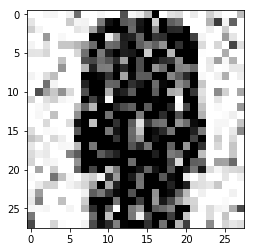

In [7]:
plt.imshow(np.reshape(x_train_[500],(28,28)),cmap='Greys')

In [8]:
x_train.shape

(60000, 28, 28)

In [16]:
model2.fit(x_, x_train_1[:,:,:,np.newaxis], epochs = 10, batch_size = 256, callbacks = [tensorboard])

Epoch 1/10
60000/60000 [==============================] - 53s 878us/step - loss: 0.2858
Epoch 2/10
60000/60000 [==============================] - 48s 794us/step - loss: 0.2855
Epoch 3/10
60000/60000 [==============================] - 47s 777us/step - loss: 0.2852
Epoch 4/10
60000/60000 [==============================] - 52s 861us/step - loss: 0.2849
Epoch 5/10
60000/60000 [==============================] - 51s 854us/step - loss: 0.2846
Epoch 6/10
60000/60000 [==============================] - 45s 742us/step - loss: 0.2843
Epoch 7/10
60000/60000 [==============================] - 45s 742us/step - loss: 0.2841
Epoch 8/10
60000/60000 [==============================] - 51s 849us/step - loss: 0.2838
Epoch 9/10
60000/60000 [==============================] - 49s 814us/step - loss: 0.2836
Epoch 10/10
60000/60000 [==============================] - 50s 832us/step - loss: 0.2834


In [17]:
pp = model2.predict(np.reshape(x_[0],(1,28,28,1)))

In [18]:
pp = np.reshape(pp,(28,28))

## reconstructed Image

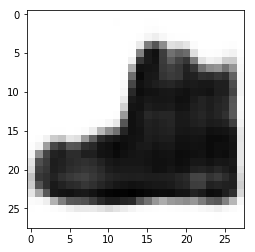

In [19]:
plt.imshow(pp,cmap='Greys')

## 

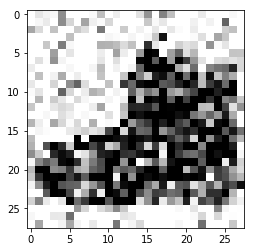

In [20]:
plt.imshow(np.reshape(x_[0],(28,28)),cmap='Greys')

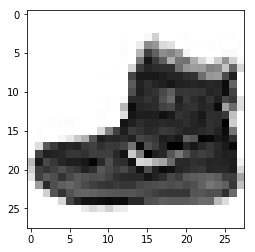

In [21]:
plt.imshow(x_train[0],cmap='Greys')